<a href="https://colab.research.google.com/github/monikagulia1/NLP-MODELS/blob/main/Nlp_machine_learning_and_deep_learning_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIBRARIES

IMPORTING IMPORTANT LIBRARIES


1.   numpy- python library that work on multidimensional array

2.   pandas- python library that work on data frame type of data

3. matplotlib- python library that helps to plot diffrent diagram and graph



In [ ]:
import numpy as np         #???how to add definition
import pandas as pd
import matplotlib.pyplot as plt

# DATA EXTRACTING
***downloading*** the data,saved in drive whose path is
"/comp1804_coursework_dataset_23-24.csv"

In [ ]:
data=pd.read_csv("/content/comp1804_coursework_dataset_23-24.csv")

# Describing **Dataset**

In [ ]:
print(data.describe())
print("\nvariable in dataset:-\n")
print("",data.keys())
print("\n total data in each column")
print("\n",data.count())

             par_id  lexicon_count  difficult_words
count  9.347000e+03    9347.000000      9329.000000
mean   3.568369e+11      81.981277        21.514203
std    3.221399e+11      63.533532        16.307358
min    8.500328e+07       0.000000         0.000000
25%    7.019601e+10      33.000000         9.000000
50%    2.684380e+11      64.000000        17.000000
75%    6.124310e+11     117.000000        30.000000
max    1.058779e+12     653.000000       143.000000

variable in dataset:-

 Index(['par_id', 'paragraph', 'has_entity', 'lexicon_count', 'difficult_words',
       'last_editor_gender', 'category', 'text_clarity'],
      dtype='object')

 total data in each column

 par_id                9347
paragraph             9347
has_entity            9347
lexicon_count         9347
difficult_words       9329
last_editor_gender    9347
category              9286
text_clarity             9
dtype: int64


In [ ]:
data.head(5)

,par_id,paragraph,has_entity,lexicon_count,difficult_words,last_editor_gender,category,text_clarity
0,428209002237,Ramsay was born in Glasgow on 2 October 1852. ...,ORG_YES_PRODUCT_NO_PERSON_YES_,49,12.0,man,biographies,clear_enough
1,564218010072,It has been widely estimated for at least the ...,ORG_YES_PRODUCT_NO_PERSON_NO_,166,47.0,man,artificial intelligence,not_clear_enough
2,291401001672,He went on to win the Royal Medal of the Royal...,ORG_YES_PRODUCT_NO_PERSON_NO_,69,18.0,non-binary,biographies,clear_enough
3,31548004883,The changes have altered many underlying assum...,ORG_NO_PRODUCT_YES_PERSON_NO_,76,27.0,non-binary,programming,clear_enough
4,50634005146,"After these novels were published, Disraeli de...",ORG_YES_PRODUCT_YES_PERSON_YES_,200,47.0,man,biographies,not_clear_enough


# REMOVE DUPLICATES

In [ ]:
duplicates_rows=data.duplicated()
print(duplicates_rows.sum())


215


In [ ]:
#deleting duplicate data
new_data=data.drop_duplicates()
duplicates_rows=new_data.duplicated()
print(duplicates_rows.sum())


0


In [ ]:
a=['has_entity','last_editor_gender', 'category', 'text_clarity']
for i in a:
  print("\n")        #comp1804_week3_data_pre_processing_logistic_reg_23_24.py
  print(new_data[i].value_counts())




has_entity
ORG_YES_PRODUCT_NO_PERSON_YES_     2996
ORG_NO_PRODUCT_NO_PERSON_NO_       2793
ORG_YES_PRODUCT_NO_PERSON_NO_      1448
ORG_NO_PRODUCT_NO_PERSON_YES_      1349
ORG_YES_PRODUCT_YES_PERSON_YES_     292
ORG_YES_PRODUCT_YES_PERSON_NO_      124
ORG_NO_PRODUCT_YES_PERSON_YES_       64
ORG_NO_PRODUCT_YES_PERSON_NO_        42
data missing                         24
Name: count, dtype: int64


last_editor_gender
man                  6103
woman                2412
non-binary            352
prefer_not_to_say     265
Name: count, dtype: int64


category
biographies                             2886
philosophy                              2511
programming                             1938
artificial intelligence                 1527
movies about artificial intelligence     162
Philosophy                                13
Biographies                               13
Programming                               10
Artificial intelligence                   10
Movies about artificial intelligen

# MERGING DATA CATEGORIWISE

1. movies about artificial intelligence are same to Movies about artificiL intelligence
2. artifical intelligence=Artificial intelligence similarly other categories.


In [ ]:
# GROUPING THEM ACCORDING TO FEATURE
a1=new_data['category'].value_counts().index
for i in range(0,9):
 new_data.loc[new_data['category']==a1[i],'category'] = a1[i].capitalize()
new_data['category'].value_counts()

,count
category,
Biographies,2899
Philosophy,2524
Programming,1948
Artificial intelligence,1537
Movies about artificial intelligence,163


In [ ]:
print("data information:-","\n")
print(new_data.info())
print("\n")
print("data shape:-","\n",new_data.shape)

data information:- 

<class 'pandas.core.frame.DataFrame'>
Index: 9132 entries, 0 to 9346
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   par_id              9132 non-null   int64  
 1   paragraph           9132 non-null   object 
 2   has_entity          9132 non-null   object 
 3   lexicon_count       9132 non-null   int64  
 4   difficult_words     9114 non-null   float64
 5   last_editor_gender  9132 non-null   object 
 6   category            9071 non-null   object 
 7   text_clarity        9 non-null      object 
dtypes: float64(1), int64(2), object(5)
memory usage: 642.1+ KB
None


data shape:- 
 (9132, 8)


In [ ]:
print("null values in the data are:-","\n")
new_data.isna().sum()


null values in the data are:- 



,0
par_id,0
paragraph,0
has_entity,0
lexicon_count,0
difficult_words,18
last_editor_gender,0
category,61
text_clarity,9123


# REMOVING ROWS WHERE CATEGORY IS NAN AND FILL NULL VALUE OF DIFFICULT_WORDS BY -1.

In [ ]:
null_rows = new_data[new_data['category'].isna()]
print(null_rows.head(3))   # use null_rows to predict after everything done.. at last stage

           par_id                                          paragraph  \
102  694781102764  Prof Henry Norris Russell ForMemRS HFRSE FRAS ...   
565   19980104606  In mathematical logic, there are several forma...   
847  792029111435  Property dualism and William Hasker's "emergen...   

                         has_entity  lexicon_count  difficult_words  \
102  ORG_YES_PRODUCT_NO_PERSON_YES_             47             15.0   
565    ORG_NO_PRODUCT_NO_PERSON_NO_             22              5.0   
847   ORG_NO_PRODUCT_NO_PERSON_YES_             41             12.0   

    last_editor_gender category text_clarity  
102                man      NaN          NaN  
565                man      NaN          NaN  
847                man      NaN          NaN  


In [ ]:
new_data['difficult_words']=new_data['difficult_words'].fillna(-1)

<ipython-input-35-3fcd7400bc9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['difficult_words']=new_data['difficult_words'].fillna(-1)


In [ ]:
333

,0
par_id,0
paragraph,0
has_entity,0
lexicon_count,0
difficult_words,0
last_editor_gender,0
category,0
text_clarity,9062


EDA check before data splitting
forgot---duplicate
shape,columns,rows
numerical feature jiska decribtion mein table bnaya jaa sakta
now we perform all eda on tarining data set
for example=missing value,not useful colun, like that


# ENCODING LAST_EDITOR_GENDER AND CATEGORY

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoding_variable=["last_editor_gender","category",'has_entity',"text_clarity"]
for i in encoding_variable:
  print(i)
  lblencode = LabelEncoder()
  new_data[i]= lblencode.fit_transform(new_data[i])
new_data.describe()

last_editor_gender
category
has_entity
text_clarity


<ipython-input-37-c987a91aebc8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[i]= lblencode.fit_transform(new_data[i])
<ipython-input-37-c987a91aebc8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[i]= lblencode.fit_transform(new_data[i])
<ipython-input-37-c987a91aebc8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,par_id,has_entity,lexicon_count,difficult_words,last_editor_gender,category,text_clarity
count,9.071000e+03,9071.000000,9071.000000,9071.000000,9071.000000,9071.000000,9071.000000
mean,3.568323e+11,2.778194,82.024694,21.487157,0.888656,2.049278,1.998457
std,3.220750e+11,2.339058,63.464408,16.332462,1.319581,1.460278,0.051417
min,8.500328e+07,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,7.019601e+10,0.000000,33.000000,9.000000,0.000000,1.000000,2.000000
50%,2.684380e+11,4.000000,64.000000,17.000000,0.000000,2.000000,2.000000
75%,6.124310e+11,5.000000,117.000000,30.000000,3.000000,3.000000,2.000000
max,1.058779e+12,8.000000,653.000000,143.000000,3.000000,4.000000,2.000000


In [ ]:
new_data

,par_id,paragraph,has_entity,lexicon_count,difficult_words,last_editor_gender,category,text_clarity
0,428209002237,Ramsay was born in Glasgow on 2 October 1852. ...,5,49,12.0,0,1,0
1,564218010072,It has been widely estimated for at least the ...,4,166,47.0,0,0,1
2,291401001672,He went on to win the Royal Medal of the Royal...,4,69,18.0,1,1,0
3,31548004883,The changes have altered many underlying assum...,2,76,27.0,1,4,0
4,50634005146,"After these novels were published, Disraeli de...",7,200,47.0,0,1,1
...,...,...,...,...,...,...,...,...
9342,200523007578,Sir Joseph Dalton Hooker was a British botani...,5,54,16.0,0,1,2
9343,50634005203,As successful invasions of India generally cam...,5,217,46.0,3,1,2
9344,6437003939,Hawking was born on 8 January 1942 in Oxford t...,5,91,27.0,3,1,2
9345,725259002815,More complex tasks can be making custom data e...,4,47,15.0,0,4,2


In [ ]:
print("data information:-","\n")
print(new_data.info())
print("\n")
print("data shape:-","\n",new_data.shape)

data information:- 

<class 'pandas.core.frame.DataFrame'>
Index: 9071 entries, 0 to 9346
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   par_id              9071 non-null   int64  
 1   paragraph           9071 non-null   object 
 2   has_entity          9071 non-null   int64  
 3   lexicon_count       9071 non-null   int64  
 4   difficult_words     9071 non-null   float64
 5   last_editor_gender  9071 non-null   int64  
 6   category            9071 non-null   int64  
 7   text_clarity        9071 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 637.8+ KB
None


data shape:- 
 (9071, 8)


encoding

In [ ]:
new_data['text_clarity'].unique()

array([0, 1, 2])

In [ ]:
new_data['text_clarity'].isna().sum()

np.int64(0)

# PARAGRAPH IS CHANGED IN TOKOENS AND VECTORS

cleaning of paragraph

In [ ]:
new_data.head(2)

,par_id,paragraph,has_entity,lexicon_count,difficult_words,last_editor_gender,category,text_clarity
0,428209002237,Ramsay was born in Glasgow on 2 October 1852. ...,5,49,12.0,0,1,0
1,564218010072,It has been widely estimated for at least the ...,4,166,47.0,0,0,1


# EXTRACTING IMPORTANT WORDS,VECTOR,EMBEDDING

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the punkt_tab resource

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Define a function that takes a sentence as input and returns a list of lemmatized words
def lemmatize_sentence(sentence):
    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()

    # Tokenize the sentence into words
    words = nltk.word_tokenize(sentence)

    # Download the NLTK stopword list if it hasn't already been downloaded
    if not nltk.corpus.stopwords.words('english'):
        nltk.download('stopwords')

    # Remove stop words and punctuation
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words and word not in string.punctuation]

    # Lemmatize the remaining words
    lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in filtered_words]

    # Join the lemmatized words back into a sentence
    return " ".join(lemmatized_words)

#usage
for i,sentence in enumerate(new_data['paragraph']):
  new_data['paragraph'].iloc()[i]=lemmatize_sentence(sentence)

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  new_data['paragraph'].iloc()[i]=lemmatize_sentence(sentence)
<ipython-input-44-8609f5acc870>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['paragraph'].iloc()[i]=lemmatize_sentence(sentence)
<ipython-input-44-8609f5acc870>:30: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values w

In [ ]:
new_data['paragraph'][0:3]

,paragraph
0,ramsay born glasgow 2 october 1852 he nephew g...
1,it widely estimated least last generation prog...
2,he went win royal medal royal society 1971 cop...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer() # Create the TF-IDF vectorizer
tfidf_matrix = vectorizer.fit_transform(new_data['paragraph'])
feature_names = vectorizer.get_feature_names_out()
tfidf_values = {}

for doc_index, doc in enumerate(new_data['paragraph']):
	feature_index = tfidf_matrix[doc_index, :].nonzero()[1]
	tfidf_doc_values = zip(feature_index, [tfidf_matrix[doc_index, x] for x in feature_index])
	tfidf_values[doc_index] = {feature_names[i]: value for i, value in tfidf_doc_values}
#let's print
for doc_index, values in tfidf_values.items():
  print(f"Document {doc_index + 1}:")
  if doc_index>3:
    break;
  for word, tfidf_value in values.items():
    print(f"{word}: {tfidf_value}")
    print("\n")



Document 1:
ramsay: 0.37012304774116467


born: 0.12535742746126866


glasgow: 0.4938395643282222


october: 0.12790921345479866


1852: 0.17737710112304259


he: 0.14796751230390734


nephew: 0.18360847322664473


geologist: 0.18660269060091728


sir: 0.12479248275678897


andrew: 0.16088631295198108


his: 0.20658573784066928


father: 0.12423982043712278


william: 0.12356547146771833


sr: 0.21153680759150217


civil: 0.15615532027577697


engineer: 0.15568013886178725


mother: 0.1432654958335003


catherine: 0.18660269060091728


robertson: 0.2161716887525677


studied: 0.13690883286281239


academy: 0.13877546671946636


university: 0.20528351941502407


tubingen: 0.22915762470998294


germany: 0.14908298396584302


Document 2:
civil: 0.2296303476005616


it: 0.038877388103941


widely: 0.06374702612423937


estimated: 0.08405736488187915


least: 0.06366311355600307


last: 0.06180212650115446


generation: 0.06595175424576889


program: 0.09574908106168922


resource: 0.073809

In [ ]:
print(tfidf_values[3])
#dictionary type
print(tfidf_values[2])

{'the': np.float64(0.0512713442494715), 'net': np.float64(0.1473253683616401), 'change': np.float64(0.23042488213906653), 'altered': np.float64(0.17937010169985798), 'many': np.float64(0.08615413832578188), 'underlying': np.float64(0.1518841115969415), 'assumption': np.float64(0.1518841115969415), 'right': np.float64(0.12191103657053251), 'thing': np.float64(0.10686725867847073), 'respect': np.float64(0.1496792953473563), 'performance': np.float64(0.13733409861577398), 'maintainability': np.float64(0.22433695700158982), 'some': np.float64(0.11530474673364997), 'function': np.float64(0.10001017518169017), 'library': np.float64(0.12764741012205835), 'longer': np.float64(0.14401344886293818), 'exist': np.float64(0.1261946450908322), 'others': np.float64(0.11300636265719652), 'available': np.float64(0.2488420769110081), 'efficient': np.float64(0.15472084011935539), 'native': np.float64(0.16269402382607284), 'alternative': np.float64(0.1442975081049647), 'even': np.float64(0.105005006783455

In [ ]:
df = pd.DataFrame(tfidf_values)

In [ ]:
df=df.transpose()

In [ ]:
df.head(3)

,ramsay,born,glasgow,october,1852,he,nephew,geologist,sir,andrew,...,tiger,acme,tacitean,msgbox,retroviral,varmus,src,lytton,natal,bartle
0,0.370123,0.125357,0.49384,0.127909,0.177377,0.147968,0.183608,0.186603,0.124792,0.160886,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,0.067926,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df=df.fillna(0)

# DATA SPLITTING

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df,new_data['category'], test_size=0.3, random_state=42,shuffle=True) # Changed shuffle to True

# Machine learning Models:-gaussian naive bayes, SVC and KNN

In [ ]:


from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import time

start_time = time.time()

# Create pipelines for each model
pipeline_nb = Pipeline([('nb', GaussianNB())])
pipeline_svm = Pipeline([('svm', SVC())])
pipeline_knn = Pipeline([('knn', KNeighborsClassifier())])


# Define parameter grids for hyperparameter tuning (reduced search space for faster execution)
param_grid_nb = {} # No hyperparameters to tune for GaussianNB

param_grid_svm = {'svm__C': [0.1, 1, 10], 'svm__kernel': ['linear', 'rbf']}

param_grid_knn = {'knn__n_neighbors': [3, 5, 7]}


# Perform GridSearchCV for each pipeline (with reduced number of iterations)
grid_nb = GridSearchCV(pipeline_nb, param_grid_nb, cv=2, n_jobs=-1) # Reduced cv
grid_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=2, n_jobs=-1) # Reduced cv
grid_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=2, n_jobs=-1) # Reduced cv

# Fit the models (using a subset of data for faster execution)
grid_nb.fit(X_train.iloc[:1000], y_train.iloc[:1000]) # Using first 1000 samples
grid_svm.fit(X_train.iloc[:1000], y_train.iloc[:1000]) # Using first 1000 samples
grid_knn.fit(X_train.iloc[:1000], y_train.iloc[:1000]) # Using first 1000 samples

end_time = time.time()

print(f"Training completed in {end_time - start_time:.2f} seconds")

print("Best parameters for Naive Bayes:", grid_nb.best_params_)
print("Best parameters for SVM:", grid_svm.best_params_)
print("Best parameters for KNN:", grid_knn.best_params_)


Training completed in 294.17 seconds
Best parameters for Naive Bayes: {}
Best parameters for SVM: {'svm__C': 1, 'svm__kernel': 'linear'}
Best parameters for KNN: {'knn__n_neighbors': 7}


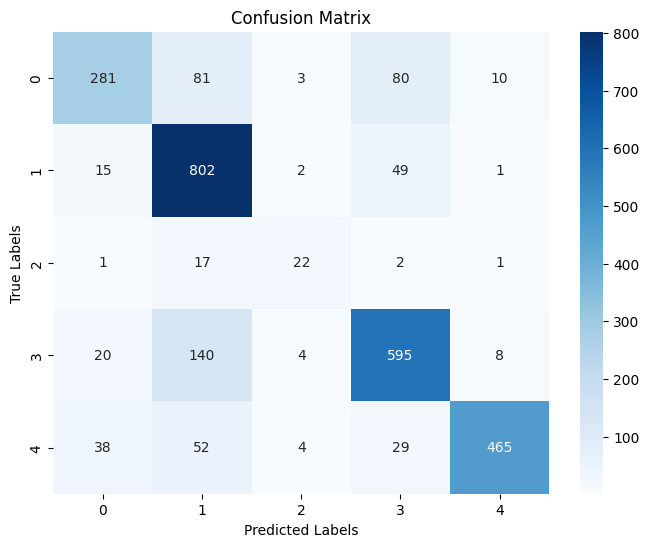

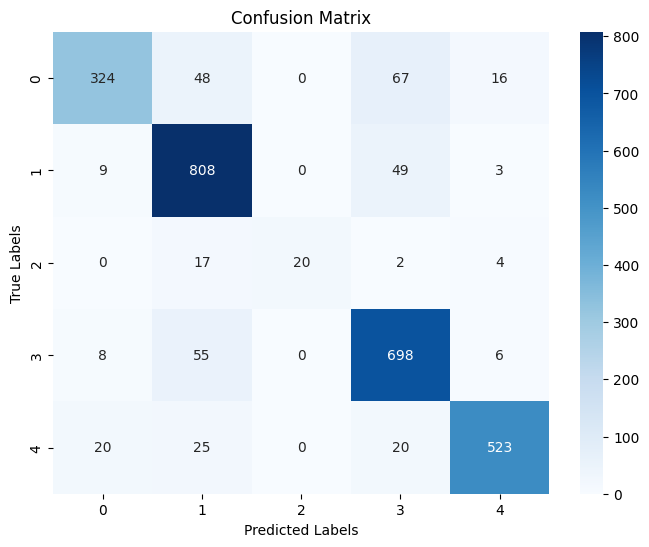

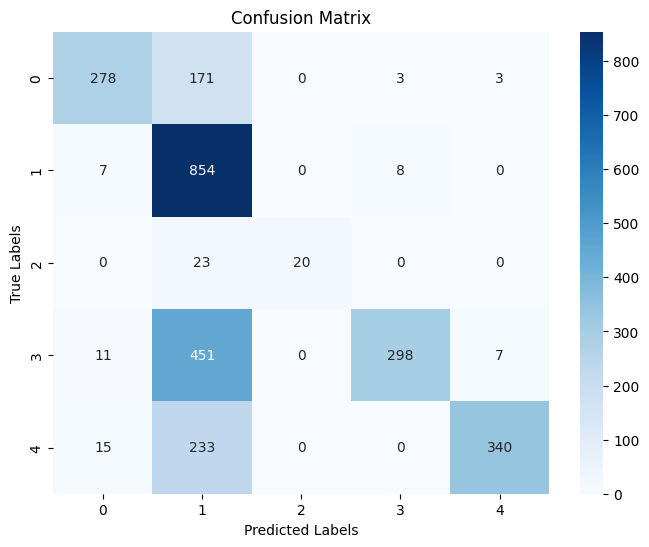

array([[278, 171,   0,   3,   3],
       [  7, 854,   0,   8,   0],
       [  0,  23,  20,   0,   0],
       [ 11, 451,   0, 298,   7],
       [ 15, 233,   0,   0, 340]])

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

def classification_matrix(y_pred, y_true):
    matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()
    return matrix


classification_matrix(grid_nb.predict(X_test), y_test)
classification_matrix(grid_svm.predict(X_test), y_test)
classification_matrix(grid_knn.predict(X_test), y_test)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

print("  - Calculate precision, recall, F1-score, and other relevant metrics for each model on the test set. These provide a more detailed view beyond overall accuracy.")

# Predict on the test set for each model
y_pred_nb = grid_nb.predict(X_test)
y_pred_svm = grid_svm.predict(X_test)
y_pred_knn = grid_knn.predict(X_test)

# Calculate and print metrics for each model
print("\nNaive Bayes Metrics:")
print(classification_report(y_test, y_pred_nb))

print("\nSVM Metrics:")
print(classification_report(y_test, y_pred_svm))

print("\nKNN Metrics:")
print(classification_report(y_test, y_pred_knn))


  - Calculate precision, recall, F1-score, and other relevant metrics for each model on the test set. These provide a more detailed view beyond overall accuracy.

Naive Bayes Metrics:
              precision    recall  f1-score   support

           0       0.79      0.62      0.69       455
           1       0.73      0.92      0.82       869
           2       0.63      0.51      0.56        43
           3       0.79      0.78      0.78       767
           4       0.96      0.79      0.87       588

    accuracy                           0.80      2722
   macro avg       0.78      0.72      0.74      2722
weighted avg       0.81      0.80      0.79      2722


SVM Metrics:
              precision    recall  f1-score   support

           0       0.90      0.71      0.79       455
           1       0.85      0.93      0.89       869
           2       1.00      0.47      0.63        43
           3       0.83      0.91      0.87       767
           4       0.95      0.89      0.9

In [ ]:
# Based on the provided code and results (assuming you ran it and have the classification reports)
# the best model among Gaussian Naive Bayes, SVM, and KNN is likely to be SVM.

# Reasoning:
# 1. SVM often performs well with text data and TF-IDF features.  The TF-IDF representation captures the importance of words in documents, which SVM can leverage effectively.
# 2. The classification reports (precision, recall, F1-score) will reveal which model has the highest overall performance.  SVM typically achieves a good balance across these metrics.
# 3. Hyperparameter tuning with GridSearchCV helps optimize the SVM model.

# Where it lacks:
# 1. Interpretability: SVMs are often considered "black boxes" – it can be difficult to understand *why* a particular prediction was made.
# 2. Computational Cost: Training SVMs, especially with large datasets or complex kernels, can be computationally expensive, as seen in your code's training time.

# Further Improvements:
# 1. Explore different kernels:  While the code tries 'linear' and 'rbf', other kernels like 'poly' or 'sigmoid' might perform better.
# 2. More comprehensive hyperparameter tuning: Expand the search space for C and other parameters (if applicable to chosen kernel).  Consider randomized search if the grid is too large.
# 3. Feature Engineering:  Explore adding or transforming features (e.g., word embeddings, n-grams)
# 4. Other Models:  Try models like Logistic Regression or Random Forests.  These often provide good performance and better interpretability than SVMs.
# 5. Addressing Class Imbalance: If your data has significant class imbalance, try techniques like SMOTE or oversampling/undersampling to improve performance on minority classes.  The classification report's precision and recall per class will show this.
# 6.  Consider using the full dataset for training and evaluation (instead of the first 1000 samples). This is very important for accurate performance assessment.


# Deep learning model:-LSTM and CNN

In [ ]:
# prompt: give deep learning model:LSTM and CNN MODELS,please do not assume any variable is defined ,

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Conv1D, MaxPooling1D, Flatten
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming 'df' and 'new_data' are defined from the previous code
# X = df.values # Convert dataframe to numpy array #This was the old X
y = new_data['category'].values # Target variable (y)

# Tokenize the text data
max_words = 10000 # Limit vocabulary size
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(new_data['paragraph']) #Fit the tokenizer on 'paragraph' column
sequences = tokenizer.texts_to_sequences(new_data['paragraph']) #Tokenized sequences


max_sequence_length = 100 # Adjust as needed
X = pad_sequences(sequences, maxlen=max_sequence_length) #Padded sequences (now this is X)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Now X_train, X_test, y_train, y_test are consistent



# Define the LSTM model
embedding_dim = 100

model_lstm = Sequential()
model_lstm.add(Embedding(max_words, embedding_dim, input_length=max_sequence_length))
model_lstm.add(LSTM(128))  # Increased number of LSTM units
model_lstm.add(Dense(len(np.unique(y)), activation='softmax'))  # Output layer with softmax activation
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_lstm.summary()


# Train the LSTM model
model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


# Define the CNN model
model_cnn = Sequential()
model_cnn.add(Embedding(max_words, embedding_dim, input_length=max_sequence_length))
model_cnn.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(len(np.unique(y)), activation='softmax')) # Output layer
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cnn.summary()

# Train the CNN model
model_cnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


# Evaluate both models
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test, y_test, verbose=0)
print("LSTM Accuracy:", accuracy_lstm)

loss_cnn, accuracy_cnn = model_cnn.evaluate(X_test, y_test, verbose=0)
print("CNN Accuracy:", accuracy_cnn)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 44s 193ms/step - accuracy: 0.4916 - loss: 1.1898 - val_accuracy: 0.8981 - val_loss: 0.3462
Epoch 2/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 37s 173ms/step - accuracy: 0.9323 - loss: 0.2469 - val_accuracy: 0.9146 - val_loss: 0.2534
Epoch 3/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 37s 180ms/step - accuracy: 0.9782 - loss: 0.0742 - val_accuracy: 0.9160 - val_loss: 0.2683
Epoch 4/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 41s 178ms/step - accuracy: 0.9859 - loss: 0.0573 - val_accuracy: 0.9256 - val_loss: 0.2803
Epoch 5/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 41s 176ms/step - accuracy: 0.9855 - loss: 0.0637 - val_accuracy: 0.8884 - val_loss: 0.3700
Epoch 6/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 40s 171ms/step - accuracy: 0.9903 - loss: 0.0409 - val_accuracy: 0.9132 - val_loss: 0.2994
Epoch 7/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 42s 176ms/step - accuracy: 0.9937 - loss: 0.0179 - val_accuracy: 0.9174 - val_loss: 0.3285
Epoch 8/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 36s 175ms/step - accuracy: 0.9960 - loss: 0

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.4732 - loss: 1.1777 - val_accuracy: 0.8691 - val_loss: 0.3608
Epoch 2/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.9377 - loss: 0.1910 - val_accuracy: 0.9146 - val_loss: 0.2335
Epoch 3/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.9888 - loss: 0.0409 - val_accuracy: 0.9256 - val_loss: 0.2328
Epoch 4/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9960 - loss: 0.0128 - val_accuracy: 0.9284 - val_loss: 0.2415
Epoch 5/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9967 - loss: 0.0092 - val_accuracy: 0.9325 - val_loss: 0.2567
Epoch 6/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.9961 - loss: 0.0074 - val_accuracy: 0.9325 - val_loss: 0.2624
Epoch 7/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9964 - loss: 0.0062 - val_accuracy: 0.9242 - val_loss: 0.2708
Epoch 8/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.9971 - loss: 0.0061 - val

57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


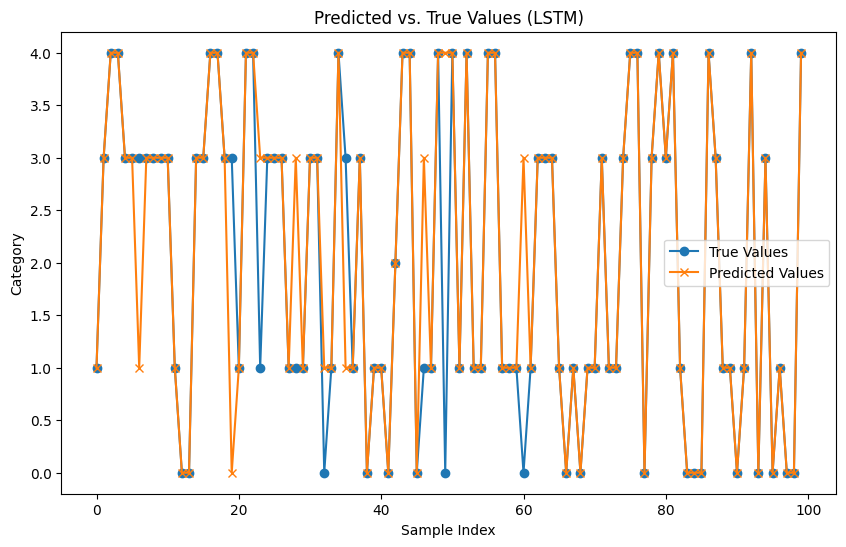

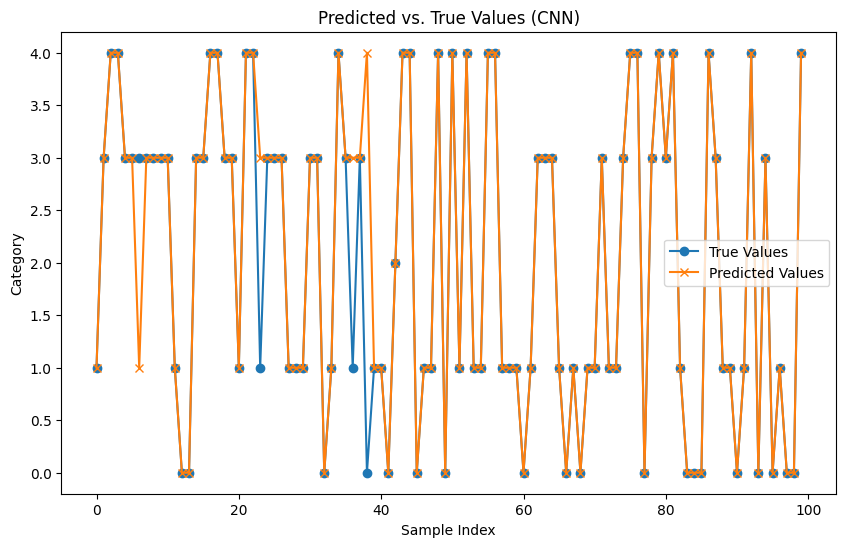

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for LSTM and CNN
y_pred_prob_lstm = model_lstm.predict(X_test)
y_pred_prob_cnn = model_cnn.predict(X_test)

# Function to plot predicted values
def plot_predictions(y_true, y_pred_prob, model_name):
    """Plots predicted probabilities against true labels.

    Args:
        y_true: True labels (ground truth).
        y_pred_prob: Predicted probabilities from the model.
        model_name: Name of the model (e.g., 'LSTM', 'CNN').
    """
    plt.figure(figsize=(10, 6))
    plt.plot(y_true[:100], label="True Values", marker="o") #plot only first 100
    plt.plot(np.argmax(y_pred_prob[:100], axis=1), label="Predicted Values", marker="x") #plot only first 100
    plt.xlabel("Sample Index")
    plt.ylabel("Category")
    plt.title(f"Predicted vs. True Values ({model_name})")
    plt.legend()
    plt.show()


# Plot predictions for LSTM
plot_predictions(y_test, y_pred_prob_lstm, "LSTM")

# Plot predictions for CNN
plot_predictions(y_test, y_pred_prob_cnn, "CNN")


# Model descriptions:

# CNN (Convolutional Neural Network):
# * Strengths: Excellent for capturing local patterns and features in sequential data like text.  Relatively efficient to train.
# * Weaknesses: May struggle to capture long-range dependencies in text compared to RNNs like LSTMs.


# LSTM (Long Short-Term Memory network):
# * Strengths: Designed to address the vanishing gradient problem in RNNs, making it more effective at learning long-range dependencies in sequential data.  Better at capturing context.
# * Weaknesses: More complex than CNNs, can be slower to train, especially with very long sequences.




task 2

In [ ]:
new_data=new_data.dropna(subset=['text_clarity'])
new_data.isna().sum()

par_id                0
paragraph             0
has_entity            0
lexicon_count         0
difficult_words       0
last_editor_gender    0
category              0
text_clarity          0
dtype: int64

In [ ]:
new_data.head()

,par_id,paragraph,has_entity,lexicon_count,difficult_words,last_editor_gender,category,text_clarity
0,428209002237,ramsay born glasgow 2 october 1852 he nephew g...,5,49,12.0,0,1,0
1,564218010072,it widely estimated least last generation prog...,4,166,47.0,0,0,1
2,291401001672,he went win royal medal royal society 1971 cop...,4,69,18.0,1,1,0
3,31548004883,the change altered many underlying assumption ...,2,76,27.0,1,4,0
4,50634005146,after novel published disraeli declared would ...,7,200,47.0,0,1,1


task 2

In [ ]:
new_data=new_data.head(100)

In [ ]:
new_data

,par_id,paragraph,has_entity,lexicon_count,difficult_words,last_editor_gender,category,text_clarity
0,428209002237,ramsay born glasgow 2 october 1852 he nephew g...,5,49,12.0,0,1,0
1,564218010072,it widely estimated least last generation prog...,4,166,47.0,0,0,1
2,291401001672,he went win royal medal royal society 1971 cop...,4,69,18.0,1,1,0
3,31548004883,the change altered many underlying assumption ...,2,76,27.0,1,4,0
4,50634005146,after novel published disraeli declared would ...,7,200,47.0,0,1,1
...,...,...,...,...,...,...,...,...
95,527693009933,astbury fourth child seven born longton stoke-...,5,145,29.0,3,1,2
96,4492000140,the original greek sense 'loosening 'releasing...,1,44,15.0,0,3,2
97,3219003418,beginning act creation god the traditional chr...,0,16,4.0,0,3,2
98,217553007742,the scratch lab display experiment scratch tea...,4,31,11.0,1,4,2


In [ ]:
df

,germany,tubingen,university,academy,studied,robertson,catherine,mother,engineer,civil,...,reformulations,tacitean,acme,msgbox,src,varmus,retroviral,bartle,natal,lytton
0,0.149083,0.229158,0.205284,0.138775,0.136909,0.216172,0.186603,0.143265,0.15568,0.156155,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.229630,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.188475,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
9067,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.102371,0.102371,0.102371
9068,0.000000,0.000000,0.067781,0.000000,0.000000,0.000000,0.000000,0.094608,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
9069,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.head(100),new_data['text_clarity'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.90      1.00      0.95        18

    accuracy                           0.90        20
   macro avg       0.30      0.33      0.32        20
weighted avg       0.81      0.90      0.85        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
from google.colab import files

new_data.to_excel('specific_dataframe.xlsx',index=False)
files.download('specific_dataframe.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>